## Importing Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict,cross_validate



## Data 

#Input Data
* **fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* **volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* **citric acid** - found in small quantities, citric acid can add 'freshness' and flavor to wines
* **residual sugar** - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* **chlorides** - the amount of salt in the wine
* **free sulfur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* **total sulfur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* **density** - the density of water is close to that of water depending on the percent alcohol and sugar content
* **pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
* **sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* **alcohol** - the percent alcohol content of the wine

#Output Data
* **quality** - output variable (based on sensory data, score between 0 and 10)


## Data Preprocessing

In [2]:
#read data
data = pd.read_csv("winequality-white.csv", sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
bins = (2.5, 5, 7.5, 10)
group_names = ['bad', 'average', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [7]:
data['quality'].value_counts()

average    3078
bad        1640
good        180
Name: quality, dtype: int64

Number of white wines:  4898
Number of features:  11


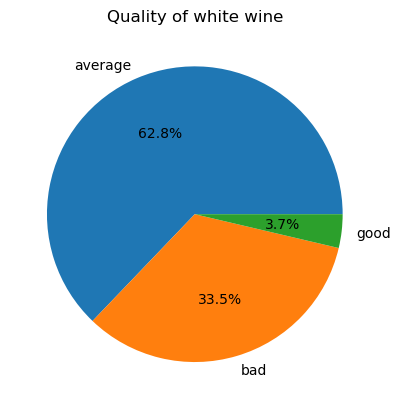

c:\Users\Miinds\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


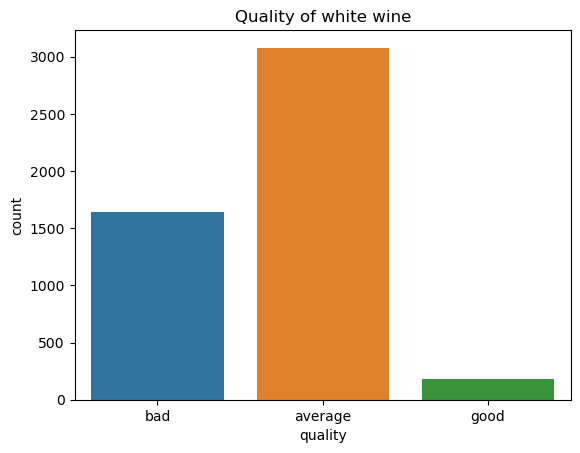

In [8]:
# white wine data
nWines = len(data)
nFeatures = len(data.columns) - 1
print("Number of white wines: ", nWines)
print("Number of features: ", nFeatures)

#get the percentage of the different quality values
nQuality = data["quality"].value_counts() 

#plot pie the percentage of the different quality values
plt.pie(nQuality, labels = nQuality.index, autopct='%1.1f%%')
plt.title("Quality of white wine")
plt.show()

#plot the countplot of the different quality values
sns.countplot(data["quality"])
plt.title("Quality of white wine")
plt.show()



In [9]:
# Encoding the categorical data
data['quality'] = data['quality'].map({'bad': 0, 'average': 1, 'good': 2})
data['quality'].value_counts()

1    3078
0    1640
2     180
Name: quality, dtype: int64

## Graphical Analysis of each feature

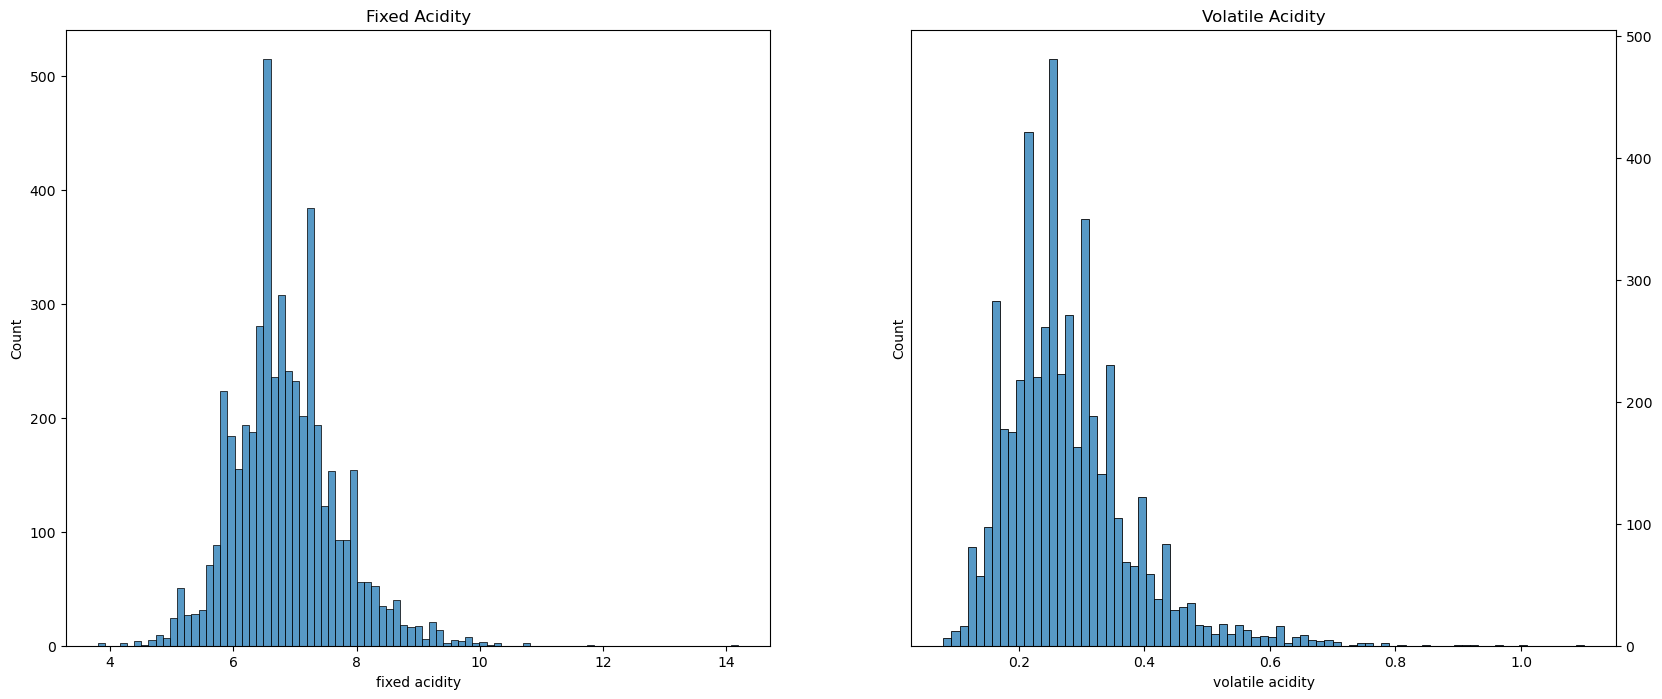

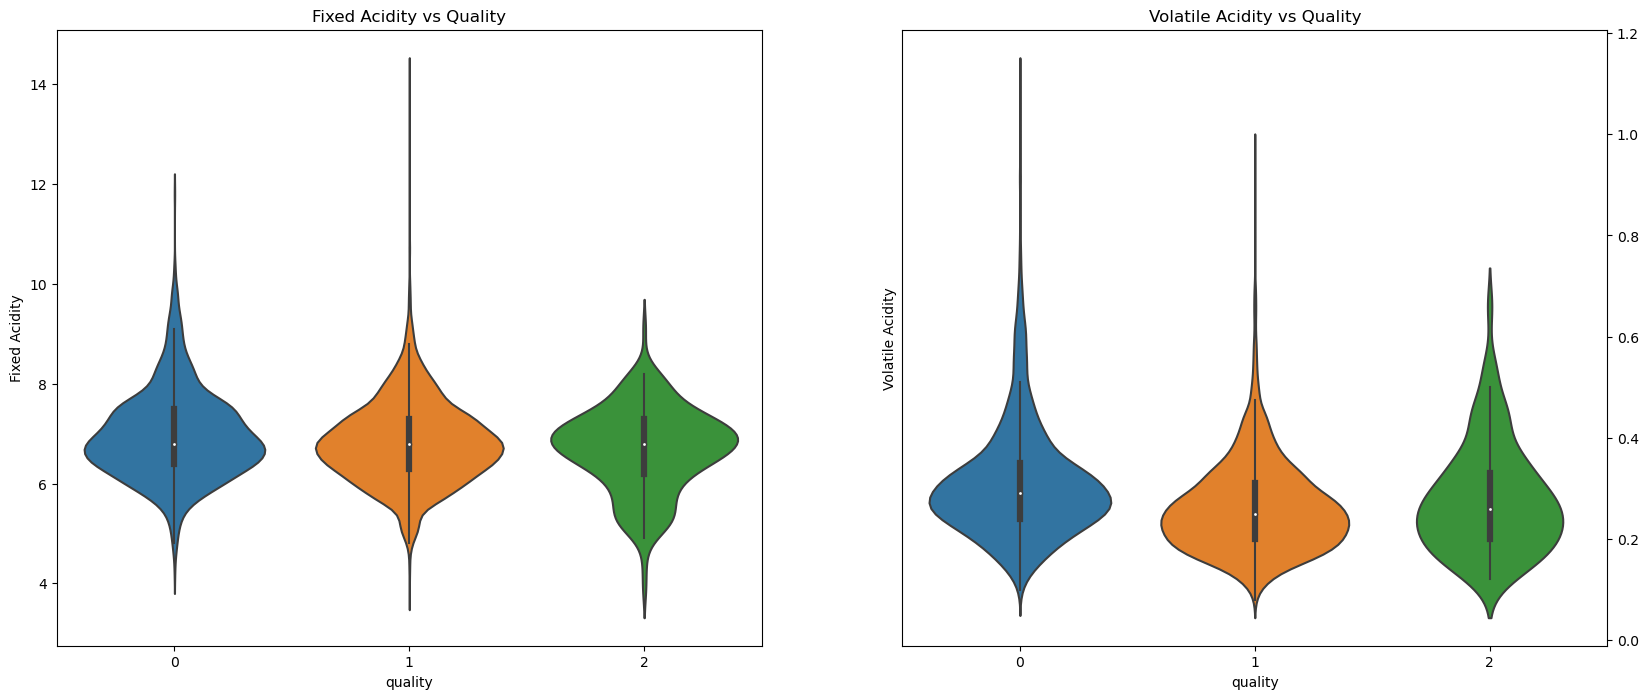

In [10]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.histplot(data['fixed acidity'], ax=ax[0])
ax[0].set_title('Fixed Acidity')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.histplot(data['volatile acidity'], ax=ax[1])
ax[1].set_title('Volatile Acidity')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

## fixed acidity with quality
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.violinplot(x='quality', y='fixed acidity', data=data, ax=ax[0])
ax[0].set_title('Fixed Acidity vs Quality')
ax[0].set_ylabel('Fixed Acidity')
ax[0].yaxis.tick_left()

## volatile acidity with quality
sns.violinplot(x='quality', y='volatile acidity', data=data, ax=ax[1])
ax[1].set_title('Volatile Acidity vs Quality')
ax[1].set_ylabel('Volatile Acidity')
ax[1].yaxis.tick_right()




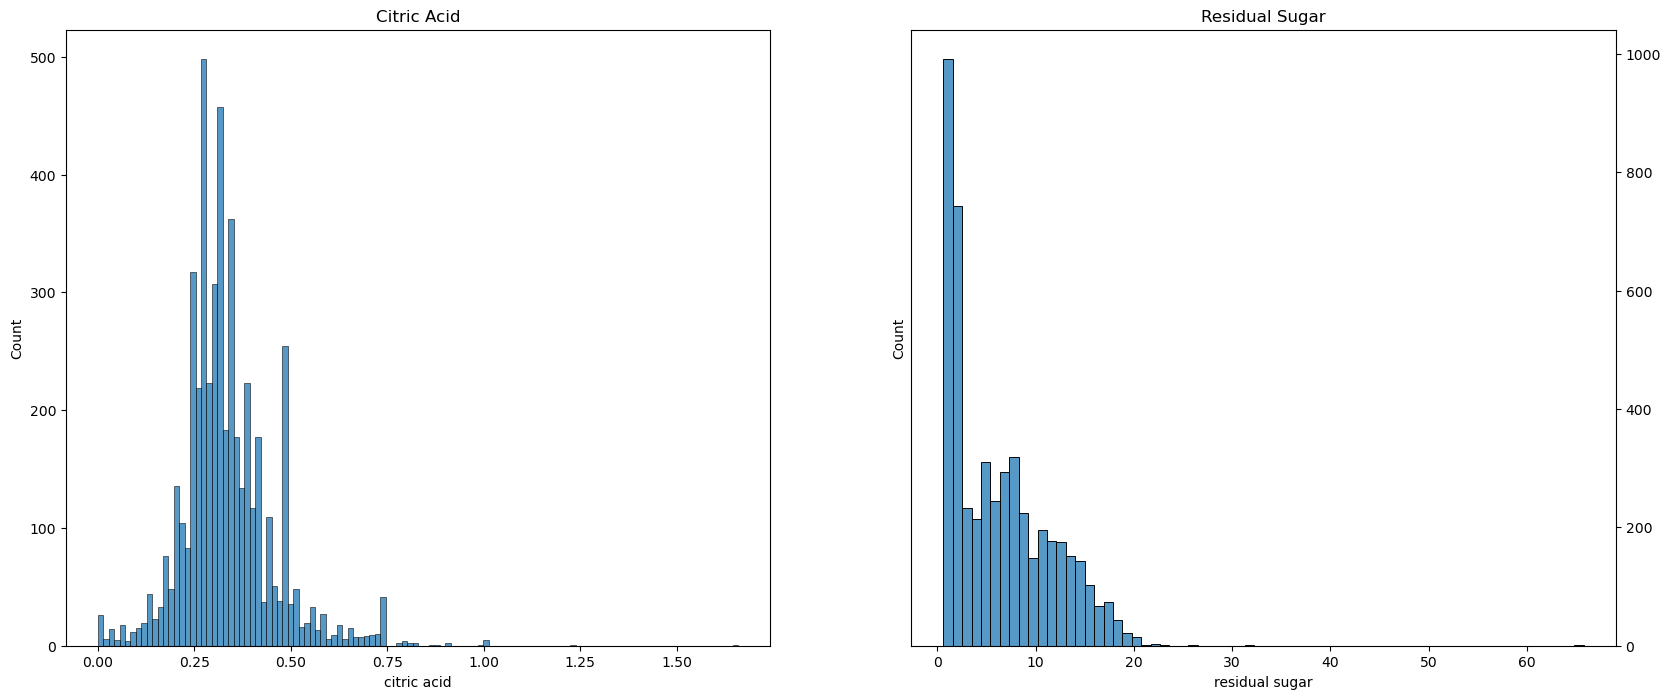

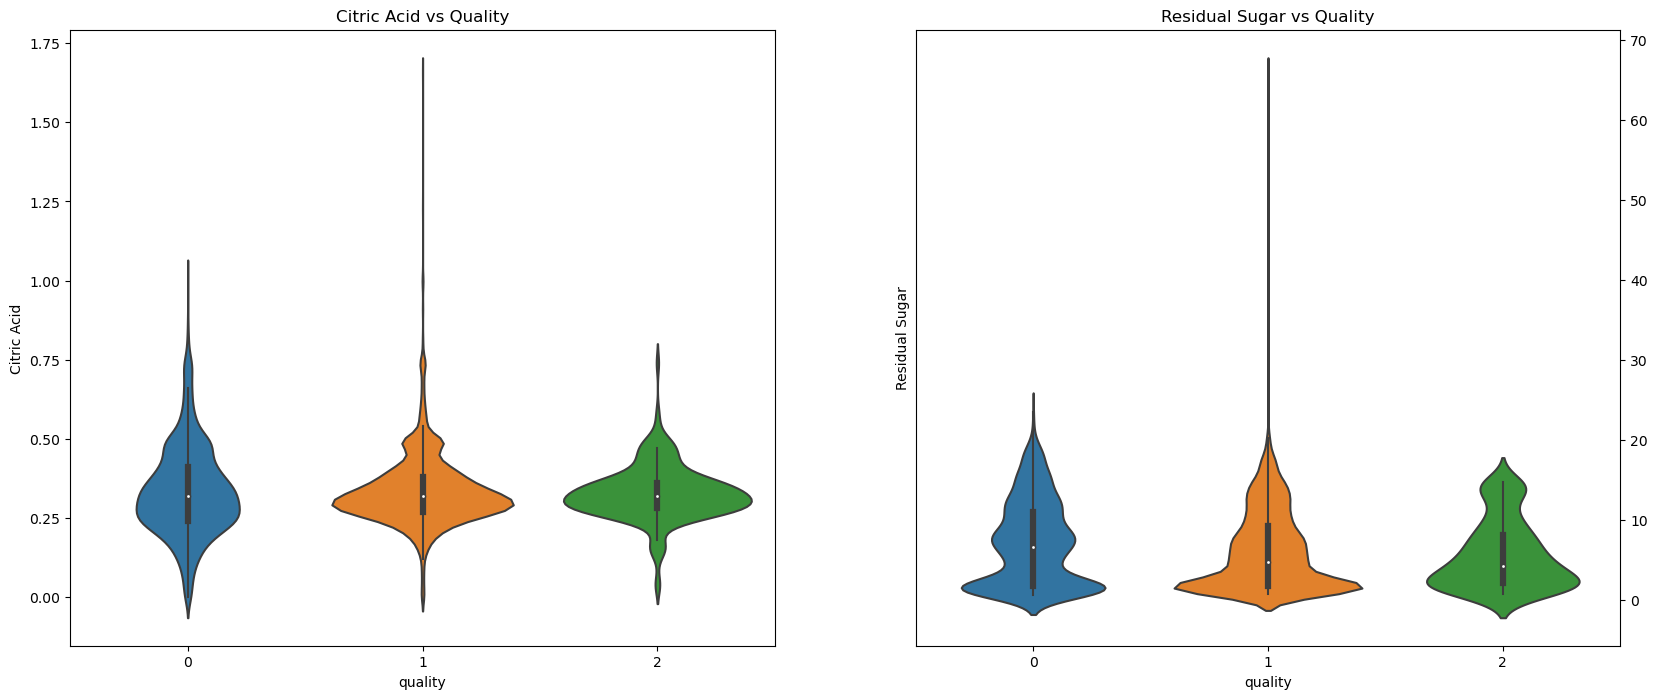

In [11]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.histplot(data['citric acid'], ax=ax[0])
ax[0].set_title('Citric Acid')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.histplot(data['residual sugar'], ax=ax[1])
ax[1].set_title('Residual Sugar')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

## citric acid with quality
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.violinplot(x='quality', y='citric acid', data=data, ax=ax[0])
ax[0].set_title('Citric Acid vs Quality')
ax[0].set_ylabel('Citric Acid')
ax[0].yaxis.tick_left()

## residual sugar with quality
sns.violinplot(x='quality', y='residual sugar', data=data, ax=ax[1])
ax[1].set_title('Residual Sugar vs Quality')
ax[1].set_ylabel('Residual Sugar')
ax[1].yaxis.tick_right()


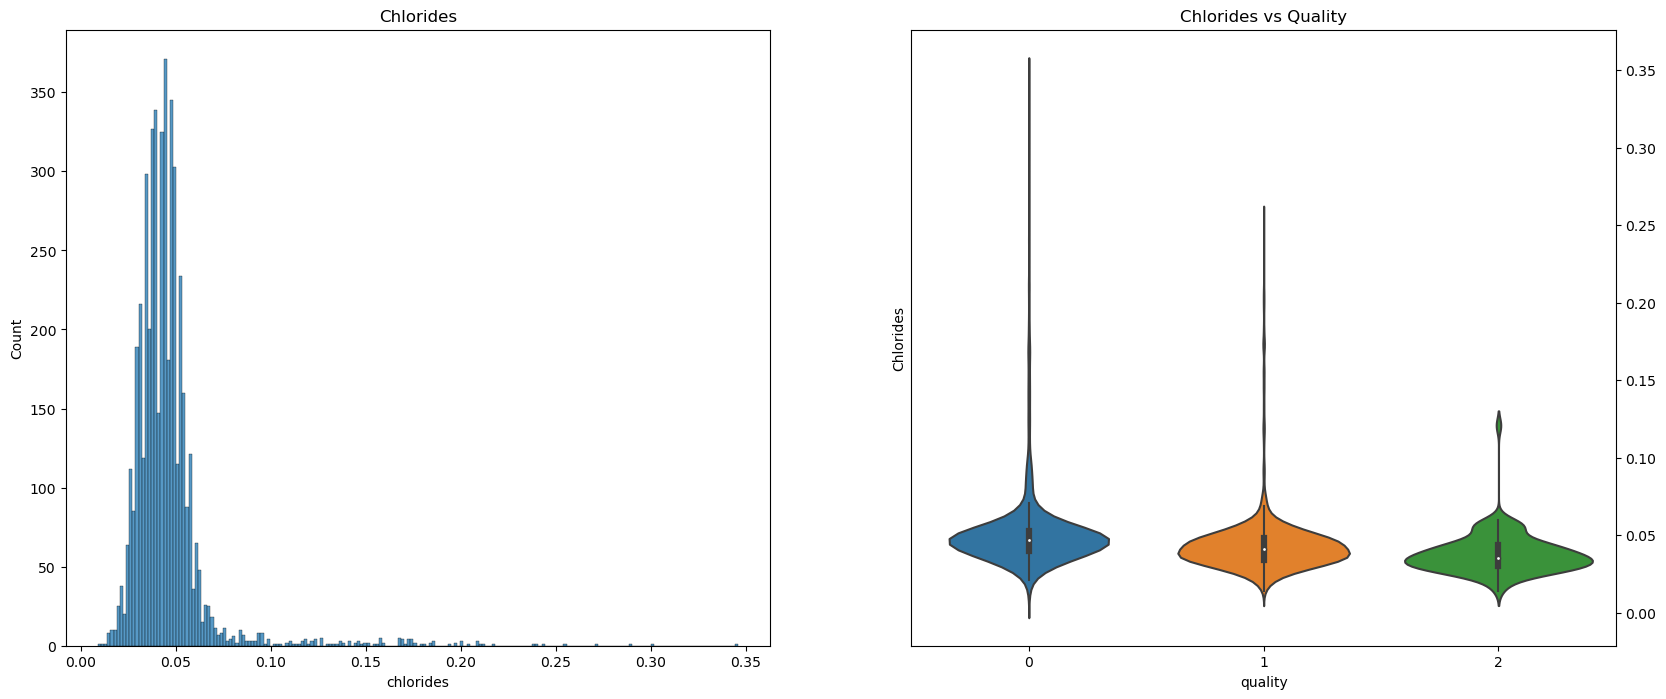

In [12]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.histplot(data['chlorides'], ax=ax[0])
ax[0].set_title('Chlorides')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

## chlorides with quality
sns.violinplot(x='quality', y='chlorides', data=data, ax=ax[1])
ax[1].set_title('Chlorides vs Quality')
ax[1].set_ylabel('Chlorides')
ax[1].yaxis.tick_right()



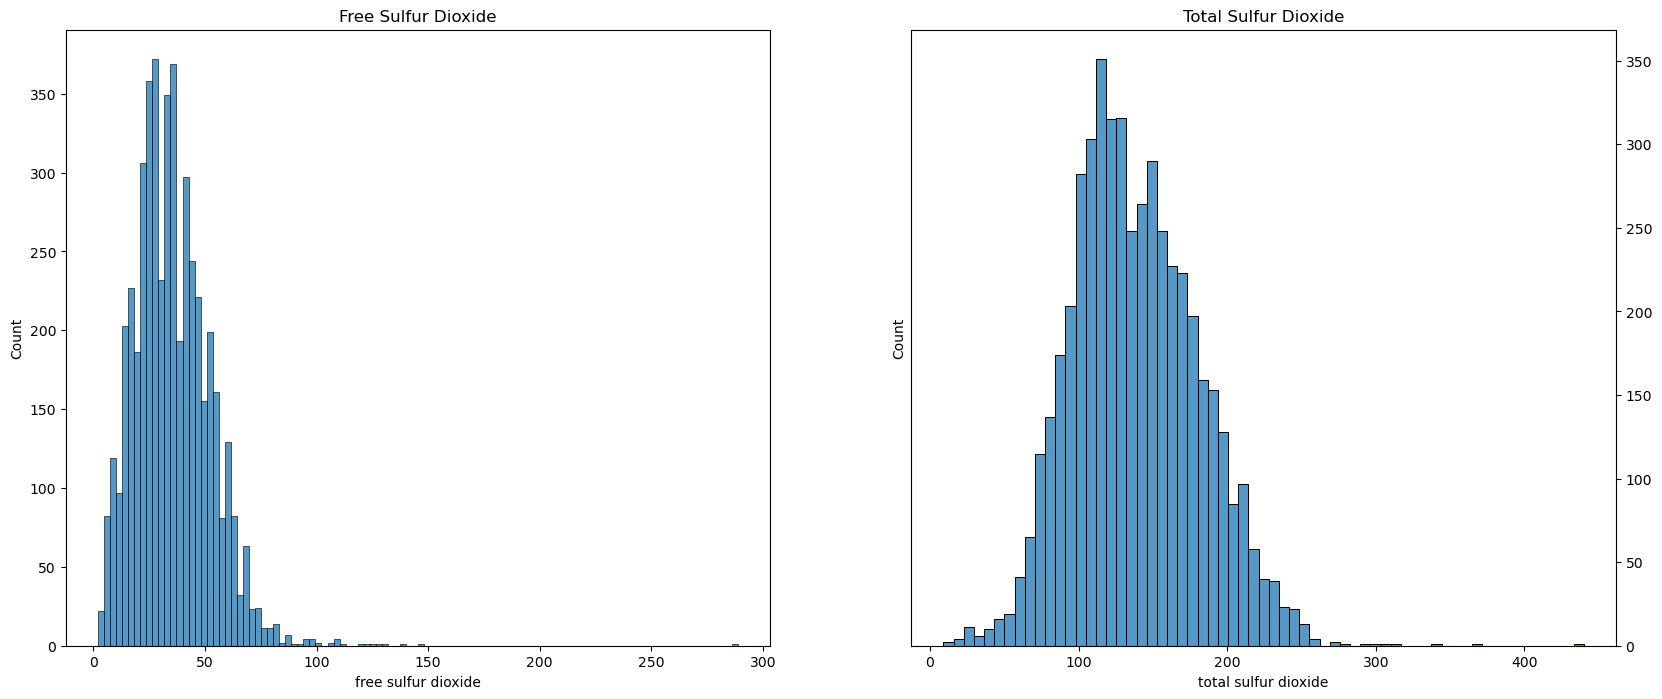

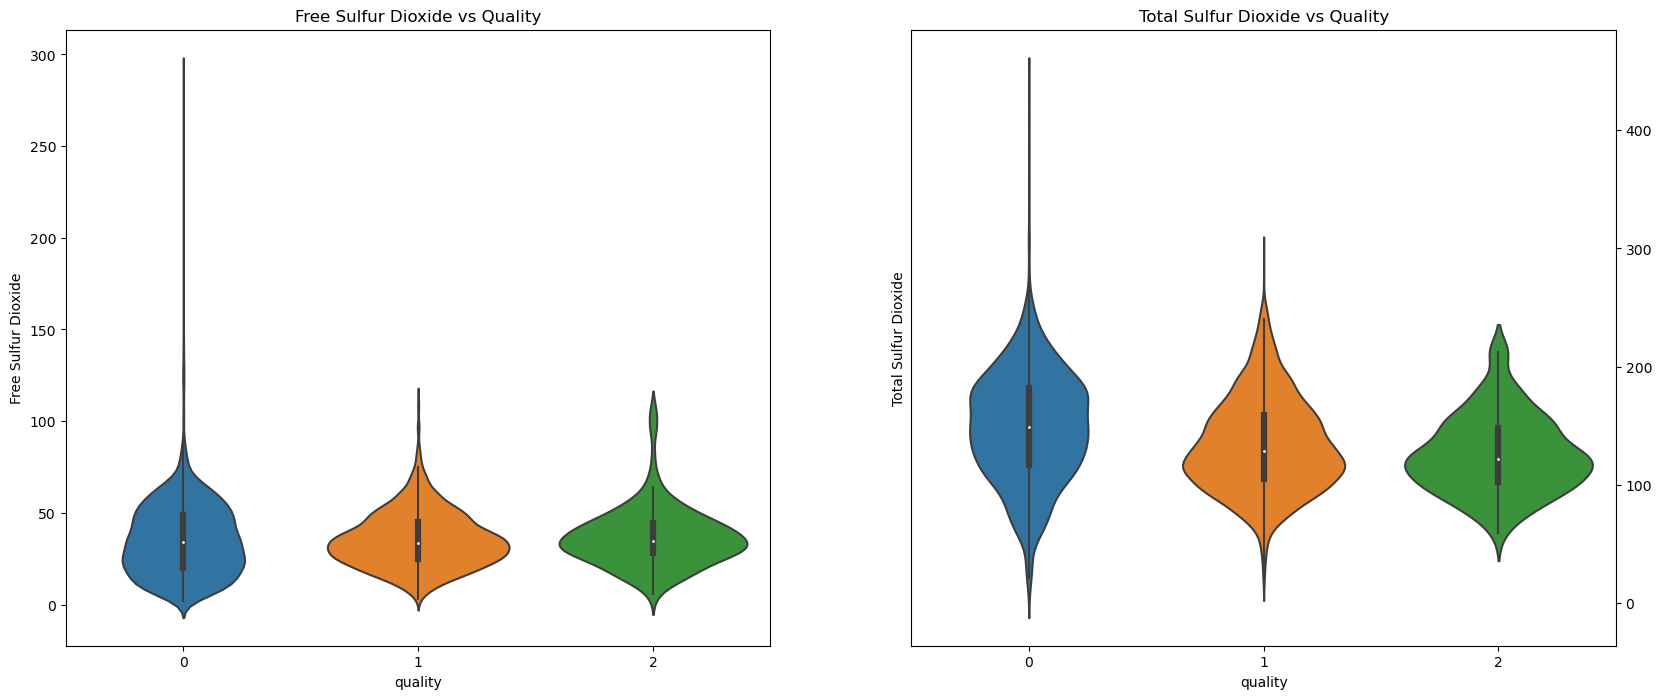

In [13]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.histplot(data['free sulfur dioxide'], ax=ax[0])
ax[0].set_title('Free Sulfur Dioxide')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.histplot(data['total sulfur dioxide'], ax=ax[1])
ax[1].set_title('Total Sulfur Dioxide')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

## free sulfur dioxide with quality
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.violinplot(x='quality', y='free sulfur dioxide', data=data, ax=ax[0])
ax[0].set_title('Free Sulfur Dioxide vs Quality')
ax[0].set_ylabel('Free Sulfur Dioxide')
ax[0].yaxis.tick_left()

## total sulfur dioxide with quality
sns.violinplot(x='quality', y='total sulfur dioxide', data=data, ax=ax[1])
ax[1].set_title('Total Sulfur Dioxide vs Quality')
ax[1].set_ylabel('Total Sulfur Dioxide')
ax[1].yaxis.tick_right()



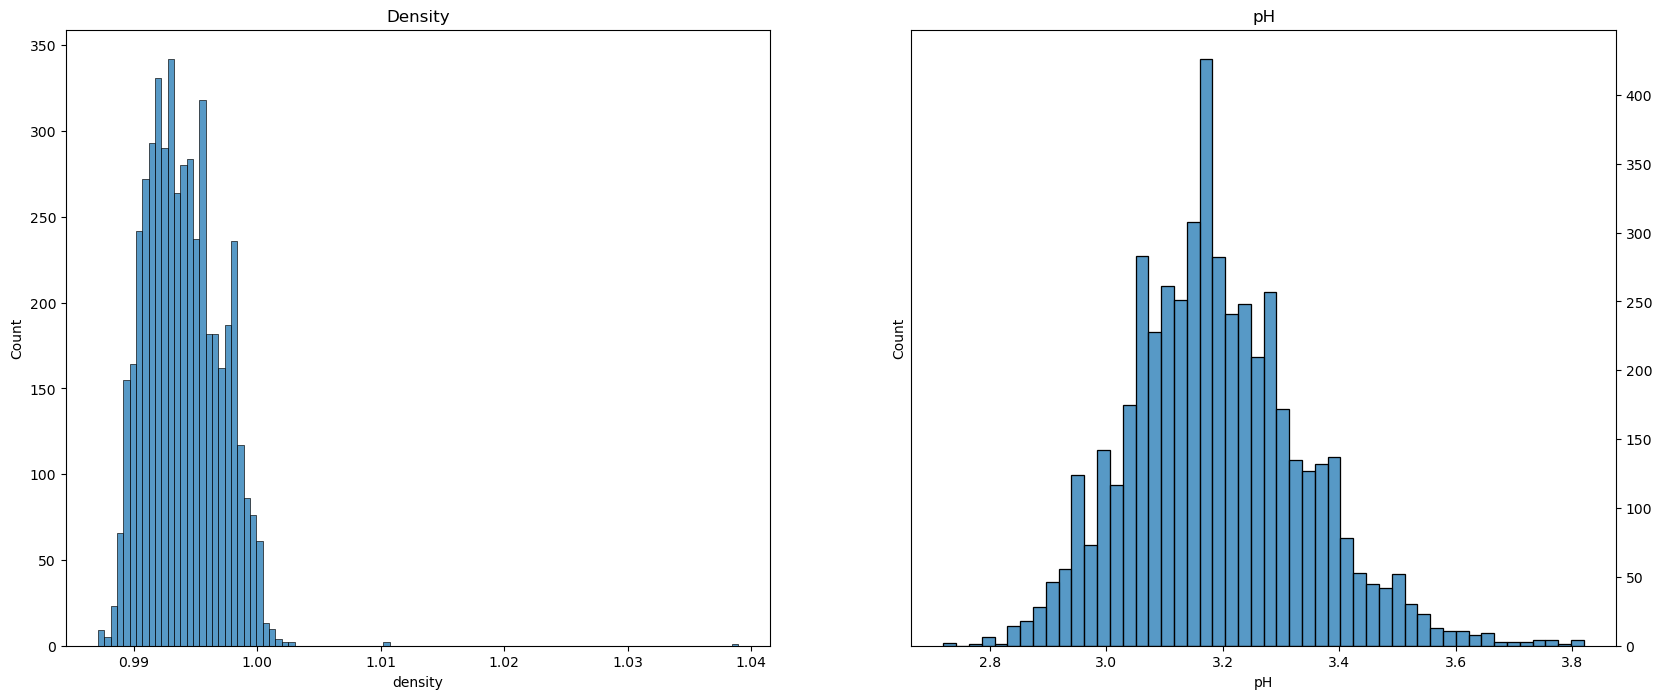

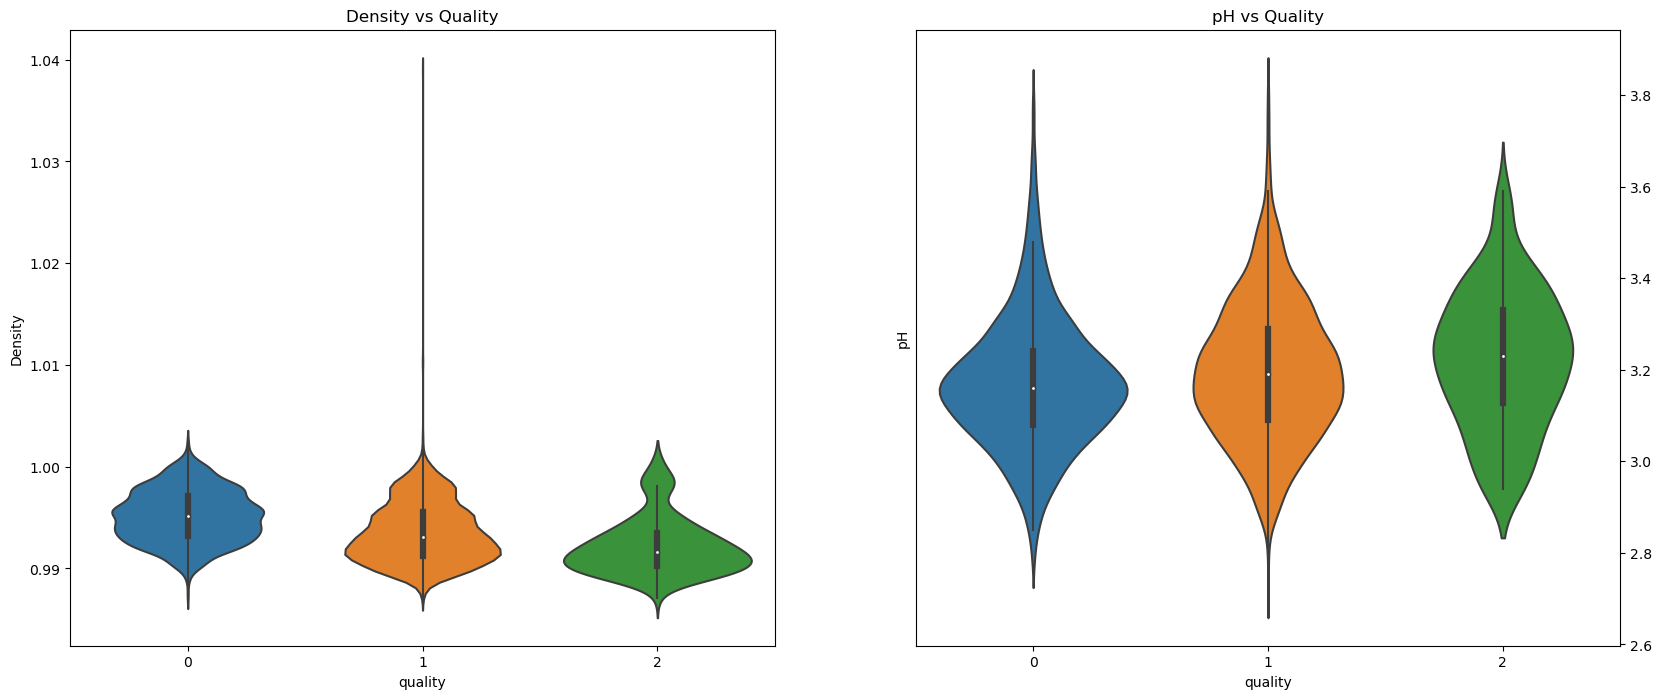

In [14]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.histplot(data['density'], ax=ax[0])
ax[0].set_title('Density')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.histplot(data['pH'], ax=ax[1])
ax[1].set_title('pH')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

## density with quality
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.violinplot(x='quality', y='density', data=data, ax=ax[0])
ax[0].set_title('Density vs Quality')
ax[0].set_ylabel('Density')
ax[0].yaxis.tick_left()

## pH with quality
sns.violinplot(x='quality', y='pH', data=data, ax=ax[1])
ax[1].set_title('pH vs Quality')
ax[1].set_ylabel('pH')
ax[1].yaxis.tick_right()



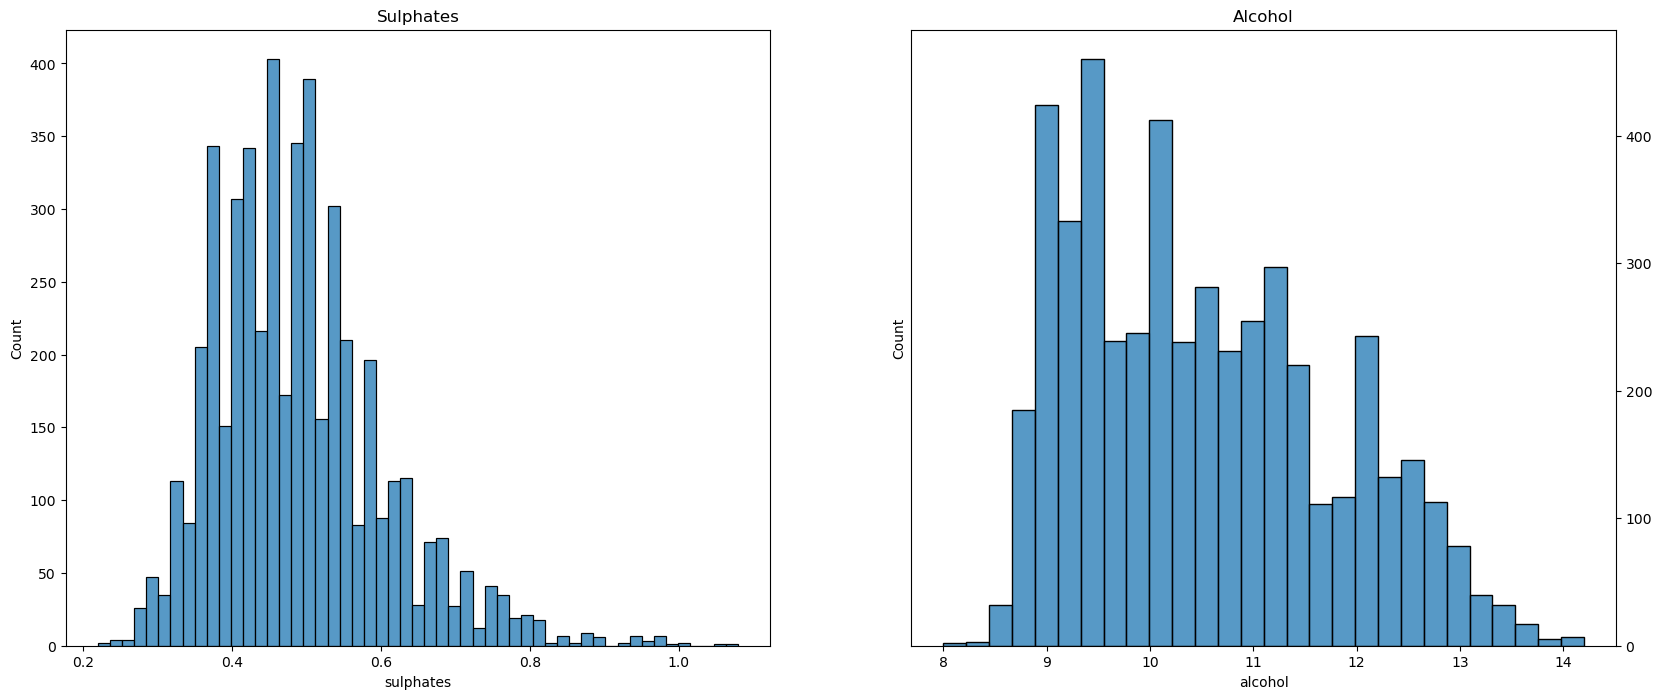

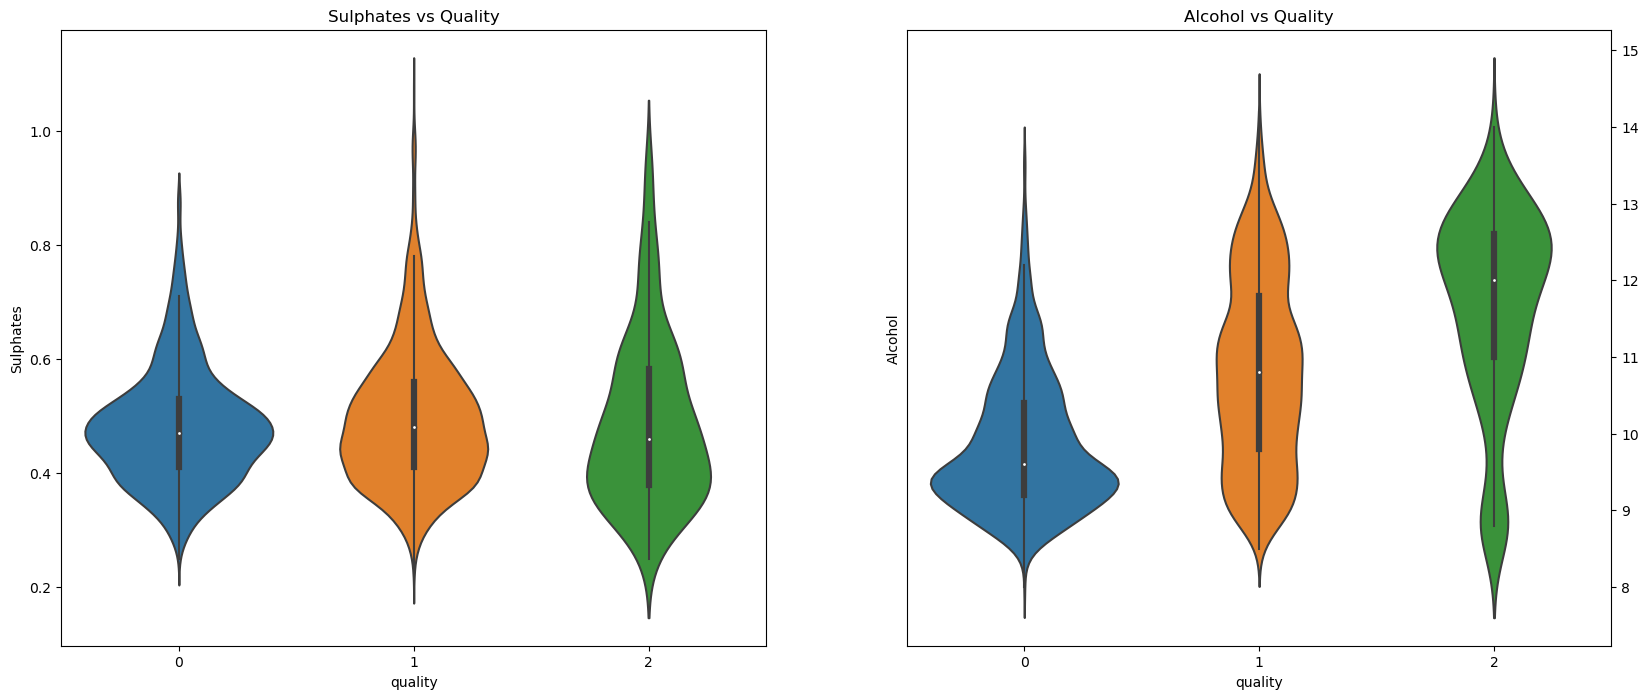

In [15]:
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.histplot(data['sulphates'], ax=ax[0])
ax[0].set_title('Sulphates')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.histplot(data['alcohol'], ax=ax[1])
ax[1].set_title('Alcohol')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

## sulphates with quality
f, ax = plt.subplots(1,2, figsize=(20,8))

sns.violinplot(x='quality', y='sulphates', data=data, ax=ax[0])
ax[0].set_title('Sulphates vs Quality')
ax[0].set_ylabel('Sulphates')
ax[0].yaxis.tick_left()

## alcohol with quality
sns.violinplot(x='quality', y='alcohol', data=data, ax=ax[1])
ax[1].set_title('Alcohol vs Quality')
ax[1].set_ylabel('Alcohol')
ax[1].yaxis.tick_right()


## Training and Testing

In [16]:
# Splitting the dataset into the Training set and Test set
X = data.drop('quality', axis = 1)
y = data['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# verify the shape of the training and test sets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)



(3918, 11)
(980, 11)
(3918,)
(980,)
[1 0 1 ... 1 1 2]


In [17]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [18]:
def train(classifier, X_train, X_test, y_train, y_test):
    # fit the training data and labels
    classifier.fit(X_train, y_train)

    #cross validation
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

    # predict the training labels
    y_pred_train = classifier.predict(X_train)
    acuracy_train = sum(y_pred_train == y_train)/float(len(y_train))
    f1_score_train = f1_score(y_train, y_pred_train, average='weighted')
    print("Train Accuracy: ", acuracy_train, "\tF1 Score: ", f1_score_train)

    # predict the test labels
    y_pred_test = classifier.predict(X_test)
    acuracy_test = accuracy_score(y_test, y_pred_test)
    f1_score_test = f1_score(y_test, y_pred_test, average='weighted')   
    print("Test Accuracy: ", acuracy_test, "\tF1 Score: ", f1_score_test)

    # Classification Report
    print("Classification Report: ")
    print(classification_report(y_test, y_pred_test))

    return y_pred_test,accuracies.mean(), acuracy_test, acuracy_train

def get_CM(classifier, y_test, y_pred_test):
    cm = confusion_matrix(y_test, y_pred_test, labels=classifier.classes_)
    return cm

def Plot_CM(cm, classifier):
    confusion_matrix_display = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
    confusion_matrix_display.plot()





## Classification Models

### Hyperparameter Search

In [19]:
def searchBestHyperParams(classifier, parameters, X_train, y_train):
    clf = GridSearchCV(classifier, parameters, scoring='accuracy')
    clf.fit(X_train, y_train)
    mean_fit_time = clf.cv_results_['mean_fit_time']
    mean_score_time = clf.cv_results_['mean_score_time']
    n_splits  = clf.n_splits_
    n_iter = pd.DataFrame(clf.cv_results_).shape[0]

    print("Time to search best hyper parameters: {} seconds".format(np.mean(mean_fit_time + mean_score_time) * n_splits * n_iter))
    print("Best parameters:")
    print(clf.best_params_)
    return clf.best_params_

### Logistic Regression

#### First train with default values

Cross Validation Accuracy: 0.72 (+/- 0.04)
Train Accuracy:  0.7200102092904543 	F1 Score:  0.6974310180238577
Test Accuracy:  0.713265306122449 	F1 Score:  0.6900093519151591
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       321
           1       0.73      0.87      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.71       980
   macro avg       0.46      0.45      0.45       980
weighted avg       0.68      0.71      0.69       980



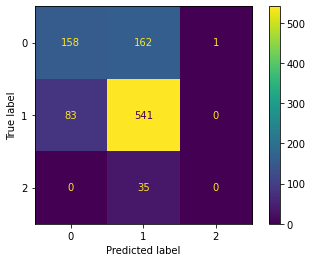

In [20]:
classifier_lr = LogisticRegression(random_state = 42, multi_class='multinomial', max_iter=500)
y_pred_test, cv_lr, acc_test_lr, acc_train_lr = train(classifier_lr, X_train, X_test, y_train, y_test)
cm_lr = get_CM(classifier_lr, y_test, y_pred_test)
Plot_CM(cm_lr, classifier_lr)

truePositives_lr = cm_lr[0][0]
falsePositives_lr = cm_lr[0][1]
falseNegatives_lr = cm_lr[1][0]
trueNegatives_lr = cm_lr[1][1]

#### Search for best hyper-parameters

In [21]:
# lbfgs, newton-cg and sag solvers only allow l2 penalties
parameters_lr = [{'solver': ['lbfgs', 'newton-cg', 'sag'], 'max_iter': [500],
                         'C': [1, 10, 100, 1000], 'penalty': ['l2'], 'random_state': [42]}]
print("Searching best hyper parameters for Logistic Regression...")
best_params_lr = searchBestHyperParams(LogisticRegression(), parameters_lr, X_train, y_train)

Searching best hyper parameters for Logistic Regression...
Time to search best hyper parameters: 10.880218982696531 seconds
Best parameters:
{'C': 1000, 'max_iter': 500, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}


#### Train with best hyper-parameters

Cross Validation Accuracy: 0.72 (+/- 0.03)
Train Accuracy:  0.718989280245023 	F1 Score:  0.6962458389800166
Test Accuracy:  0.713265306122449 	F1 Score:  0.690653312834903
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.50      0.56       321
           1       0.73      0.87      0.79       624
           2       0.00      0.00      0.00        35

    accuracy                           0.71       980
   macro avg       0.46      0.45      0.45       980
weighted avg       0.68      0.71      0.69       980



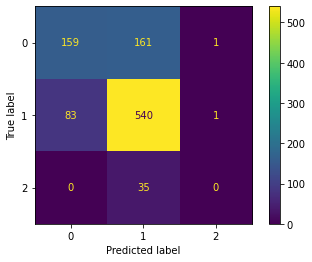

In [22]:
classifier_lr = LogisticRegression(random_state = 42, multi_class='multinomial', 
                                   solver=best_params_lr['solver'], max_iter=best_params_lr['max_iter'],
                                   C=best_params_lr['C'], penalty=best_params_lr['penalty'])
y_pred_test, cv_lr, acc_test_lr, acc_train_lr = train(classifier_lr, X_train, X_test, y_train, y_test)
cm_lr = get_CM(classifier_lr, y_test, y_pred_test)
Plot_CM(cm_lr, classifier_lr)



### Support Vector Machine (SVM)

#### First train with default values

Cross Validation Accuracy: 0.75 (+/- 0.03)
Train Accuracy:  0.7756508422664625 	F1 Score:  0.7565250848489549
Test Accuracy:  0.7408163265306122 	F1 Score:  0.7214409474941528
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       321
           1       0.76      0.87      0.81       624
           2       0.00      0.00      0.00        35

    accuracy                           0.74       980
   macro avg       0.48      0.48      0.48       980
weighted avg       0.71      0.74      0.72       980



C:\Users\fran_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fran_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fran_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


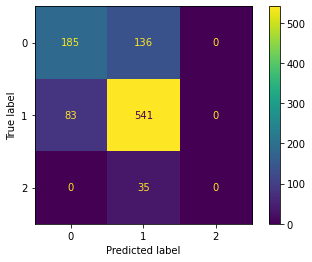

In [23]:
classifier_svm = SVC(random_state = 42)
y_pred_test,cv_svm,acc_test_svm,acc_train_svm = train(classifier_svm, X_train, X_test, y_train, y_test)
cm_svm = get_CM(classifier_svm, y_test, y_pred_test)
Plot_CM(cm_svm, classifier_svm)

truePositives_svm = cm_svm[0][0]
falsePositives_svm = cm_svm[0][1]
falseNegatives_svm = cm_svm[1][0]
trueNegatives_svm = cm_svm[1][1]

#### Search for best hyper-parameters

In [24]:
parameters_svm = [{'C': [1, 10, 100, 1000], 
                   'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}]
print("Searching best hyper parameters for SVM...")
best_params_svm = searchBestHyperParams(SVC(), parameters_svm, X_train, y_train)

Searching best hyper parameters for SVM...
Time to search best hyper parameters: 178.13968539237976 seconds
Best parameters:
{'C': 1, 'gamma': 1}


#### Train with best hyper-parameters

Cross Validation Accuracy: 0.76 (+/- 0.04)
Train Accuracy:  0.9520163348647269 	F1 Score:  0.9502912111400768
Test Accuracy:  0.7683673469387755 	F1 Score:  0.7529655415525565
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.56      0.64       321
           1       0.77      0.91      0.83       624
           2       1.00      0.20      0.33        35

    accuracy                           0.77       980
   macro avg       0.84      0.56      0.60       980
weighted avg       0.77      0.77      0.75       980



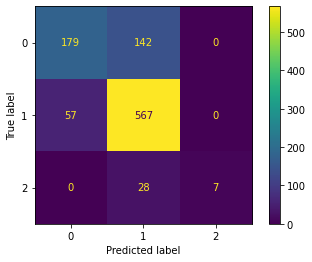

In [25]:
classifier_svm = SVC(kernel = 'rbf', random_state = 42, C=best_params_svm['C'], gamma=best_params_svm['gamma'])
y_pred_test,cv_svm,acc_test_svm,acc_train_svm = train(classifier_svm, X_train, X_test, y_train, y_test)
cm_svm = get_CM(classifier_svm, y_test, y_pred_test)
Plot_CM(cm_svm, classifier_svm)


### Neural Network

#### First train with default values

Cross Validation Accuracy: 0.75 (+/- 0.05)
Train Accuracy:  0.8637059724349158 	F1 Score:  0.858295877117437
Test Accuracy:  0.763265306122449 	F1 Score:  0.7558401754907925
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       321
           1       0.79      0.86      0.82       624
           2       0.39      0.20      0.26        35

    accuracy                           0.76       980
   macro avg       0.63      0.57      0.59       980
weighted avg       0.75      0.76      0.76       980



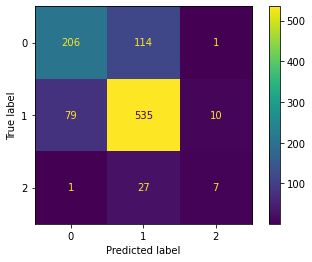

In [26]:
classifier_nn = MLPClassifier(max_iter=1000)
y_pred_test , cv_nn, acc_test_nn, acc_train_nn = train(classifier_nn, X_train, X_test, y_train, y_test)
cm_nn = get_CM(classifier_nn, y_test, y_pred_test)
Plot_CM(cm_nn, classifier_nn)

truePositives_nn = cm_nn[0][0]
falsePositives_nn = cm_nn[0][1]
falseNegatives_nn = cm_nn[1][0]
trueNegatives_nn = cm_nn[1][1]

#### Search for best hyper-parameters

In [27]:
parameters_nn = [{'max_iter': [1000], 'alpha': [1e-3,1e-4], 'learning_rate': ['constant', 'adaptive'], 
                  'learning_rate_init': [0.001, 0.01, 0.05],
                  'hidden_layer_sizes': [(11), (100), (11,11), (22,22)]}]
print("Searching best hyper parameters for Neural Network...")
best_params_nn = searchBestHyperParams(MLPClassifier(), parameters_nn, X_train, y_train)

Searching best hyper parameters for Neural Network...
Time to search best hyper parameters: 914.292132616043 seconds
Best parameters:
{'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000}


#### Train with best hyper-parameters

Cross Validation Accuracy: 0.74 (+/- 0.04)
Train Accuracy:  0.8677896886166412 	F1 Score:  0.8641130419643468
Test Accuracy:  0.7540816326530613 	F1 Score:  0.7484251094313877
Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       321
           1       0.79      0.84      0.81       624
           2       0.33      0.20      0.25        35

    accuracy                           0.75       980
   macro avg       0.61      0.56      0.58       980
weighted avg       0.75      0.75      0.75       980



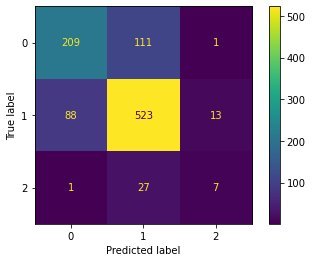

In [28]:
classifier_nn = MLPClassifier(alpha=best_params_nn['alpha'], hidden_layer_sizes=(best_params_nn['hidden_layer_sizes']), 
                              learning_rate=best_params_nn['learning_rate'], 
                              learning_rate_init=best_params_nn['learning_rate_init'], max_iter=best_params_nn['max_iter'])
y_pred_test , cv_nn, acc_test_nn, acc_train_nn = train(classifier_nn, X_train, X_test, y_train, y_test)
cm_nn = get_CM(classifier_nn, y_test, y_pred_test)
Plot_CM(cm_nn, classifier_nn)


## K-Fold Cross Validation

In [29]:
#k fold cross validation
def kfold(X_train, y_train, X_test, y_test, classifier, k):
    kf = KFold(n_splits=k, shuffle=True)
    
    scores = cross_validate(classifier, X_train, y_train, scoring='accuracy', cv=k, return_estimator=True)

    avg_acc_score = sum(scores['test_score'])/k

   

    print('Accuracy of each fold - {}'.format(scores['test_score']))
    
    best_estimator = scores['estimator'][np.argmax(scores['test_score'])]

    y_pred_test = best_estimator.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    acc_train = sum(y_train == best_estimator.predict(X_train)) / float(len(y_train))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    cross_validate_scores = {'Average Accuracy': avg_acc_score, 'F1': f1_test, 'Accuracy_train': acc_train, 'Accuracy_test': acc_test}
    print(cross_validate_scores)
    return y_pred_test, cross_validate_scores

    

## Optimizing with k-Fold Cross Validation

Accuracy of each fold - [0.70153061 0.71428571 0.7372449  0.72030651 0.71775223]
{'Average Accuracy': 0.7182239945786744, 'F1': 0.6891261745763183, 'Accuracy_train': 0.7207759060745278, 'Accuracy_test': 0.7122448979591837}


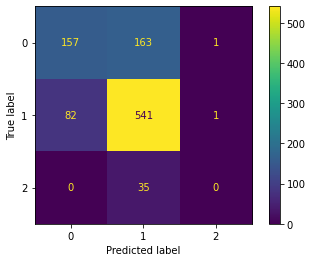

In [30]:
#logistic regression
y_pred_test, scores_lr = kfold(X_train, y_train, X_test, y_test, classifier_lr, 5)
cm_lr = get_CM(classifier_lr, y_test, y_pred_test)
Plot_CM(cm_lr, classifier_lr)

Accuracy of each fold - [0.74362245 0.78443878 0.75       0.74712644 0.75862069]
{'Average Accuracy': 0.7567616701853155, 'F1': 0.7542401363691722, 'Accuracy_train': 0.9180704441041347, 'Accuracy_test': 0.7714285714285715}


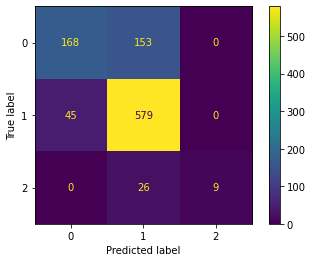

In [31]:
#svm
y_pred_test, scores_svm = kfold(X_train, y_train, X_test, y_test, classifier_svm, 5)
cm_svm = get_CM(classifier_svm, y_test, y_pred_test)
Plot_CM(cm_svm, classifier_svm)

Accuracy of each fold - [0.73852041 0.74617347 0.73469388 0.74457216 0.74840358]
{'Average Accuracy': 0.7424726978914171, 'F1': 0.7386267084303645, 'Accuracy_train': 0.8371618172537009, 'Accuracy_test': 0.7438775510204082}


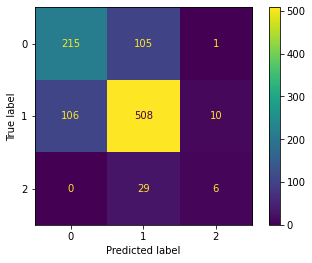

In [32]:
#neural network
y_pred_test,scores_nn = kfold(X_train, y_train, X_test, y_test, classifier_nn, 5)
cm_nn = get_CM(classifier_nn, y_test, y_pred_test)
Plot_CM(cm_nn, classifier_nn)

## Comparing the models

In [33]:
models =   [('Logistic Regression', scores_lr['Accuracy_train'], scores_lr['Accuracy_test'], scores_lr['Average Accuracy'], scores_lr['F1']),
            ('Support Vector Machine', scores_svm['Accuracy_train'], scores_svm['Accuracy_test'], scores_svm['Average Accuracy'], scores_svm['F1']),
           ('Neural Network', scores_nn['Accuracy_train'], scores_nn['Accuracy_test'], scores_nn['Average Accuracy'], scores_nn['F1'])]

predict = pd.DataFrame(data = models, columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Cross Validation', 'F1'])
predict

,Model,Train Accuracy,Test Accuracy,Cross Validation,F1
0,Logistic Regression,0.720776,0.712245,0.718224,0.689126
1,Support Vector Machine,0.918070,0.771429,0.756762,0.754240
2,Neural Network,0.837162,0.743878,0.742473,0.738627


### Training and test accuracy of the models

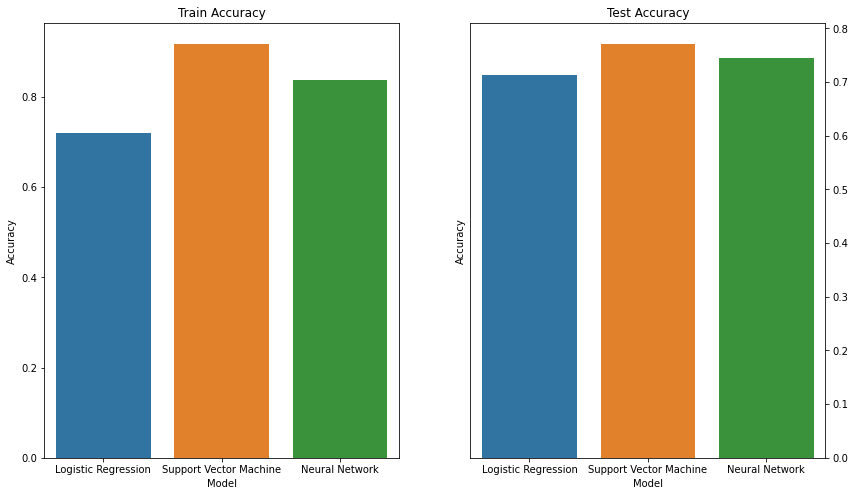

In [34]:
f, ax = plt.subplots(1,2, figsize=(14,8))

sns.barplot(x='Model', y='Train Accuracy', data=predict, ax=ax[0])
ax[0].set_title('Train Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].yaxis.tick_left()

sns.barplot(x='Model', y='Test Accuracy', data=predict, ax=ax[1])
ax[1].set_title('Test Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].yaxis.tick_right()




### Cross Validation

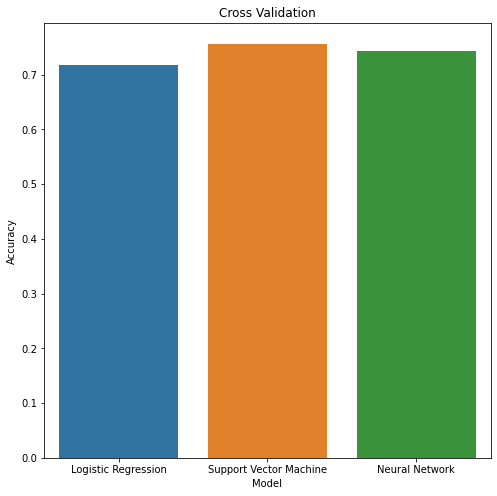

In [35]:
f, ax = plt.subplots(1,1, figsize=(8,8))

sns.barplot(x='Model', y='Cross Validation', data=predict, ax=ax)
ax.set_title('Cross Validation')
ax.set_ylabel('Accuracy')
ax.yaxis.tick_left()


### Feature Importance

Feature: 0, Score: -0.10981
Feature: 1, Score: 0.48294
Feature: 2, Score: 0.00655
Feature: 3, Score: -0.87468
Feature: 4, Score: -0.03266
Feature: 5, Score: -0.23678
Feature: 6, Score: 0.03327
Feature: 7, Score: 0.87040
Feature: 8, Score: -0.22074
Feature: 9, Score: -0.15895
Feature: 10, Score: -0.76332


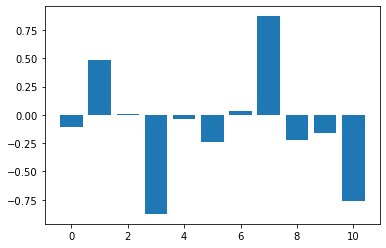

In [36]:
importances = classifier_lr.coef_[0]

for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importances))], importances)
plt.show()